In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
data = pd.read_csv("Sales Dataset.csv")
print("📋 Columns in dataset:", data.columns)

📋 Columns in dataset: Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')


In [3]:
data.ffill(inplace=True)


In [4]:
if 'OrderDate' in data.columns:
    data['OrderDate'] = pd.to_datetime(data['OrderDate'], errors='coerce')
    data['Month'] = data['OrderDate'].dt.month
    data['Year'] = data['OrderDate'].dt.year

In [5]:
if 'CustomerAge' in data.columns:
    data['CustomerAge'] = pd.to_numeric(data['CustomerAge'], errors='coerce')
    data['CustomerAgeGroup'] = pd.cut(
        data['CustomerAge'],
        bins=[18, 30, 45, 60, 100],
        labels=['18-30', '31-45', '46-60', '60+']
    )

In [6]:
assert not data.isnull().values.any(), "❌ Null values still present!"
assert data.duplicated().sum() == 0, "❌ Duplicate entries still exist!"


In [7]:
print(data.describe())

if 'ProductCategory' in data.columns:
    print("\nProduct Categories:\n", data['ProductCategory'].value_counts())

if 'Region' in data.columns and 'Sales' in data.columns:
    print("\nSales by Region:\n", data.groupby('Region')['Sales'].sum())

            Amount       Profit     Quantity
count  1194.000000  1194.000000  1194.000000
mean   5178.089615  1348.992462    10.674204
std    2804.921955  1117.992573     5.777102
min     508.000000    50.000000     1.000000
25%    2799.000000   410.000000     6.000000
50%    5152.000000  1014.000000    11.000000
75%    7626.000000  2035.000000    16.000000
max    9992.000000  4930.000000    20.000000


In [8]:
if 'Sales' in data.columns:
    data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
    iso = IsolationForest(contamination=0.01, random_state=42)
    data['Anomaly'] = iso.fit_predict(data[['Sales']])
    anomalies = data[data['Anomaly'] == -1]
    print(f"🚨 Found {len(anomalies)} anomalies.")

In [9]:
if 'Sales' in data.columns:
    data['Sales'] = np.log1p(data['Sales'])

In [10]:
if 'Sales' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Sales'], color='skyblue')
    plt.title("🔹 Sales Distribution (Log Transformed)", fontsize=14)
    plt.xlabel("Log(Sales)")
    plt.grid(True)
    plt.show()

In [11]:
if 'Month' in data.columns and 'Sales' in data.columns:
    plt.figure(figsize=(12, 6))
    monthly_sales = data.groupby('Month')['Sales'].mean()
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='green')
    plt.title("🗕️ Average Monthly Sales")
    plt.xlabel("Month")
    plt.ylabel("Avg Log(Sales)")
    plt.grid(True)
    plt.show()

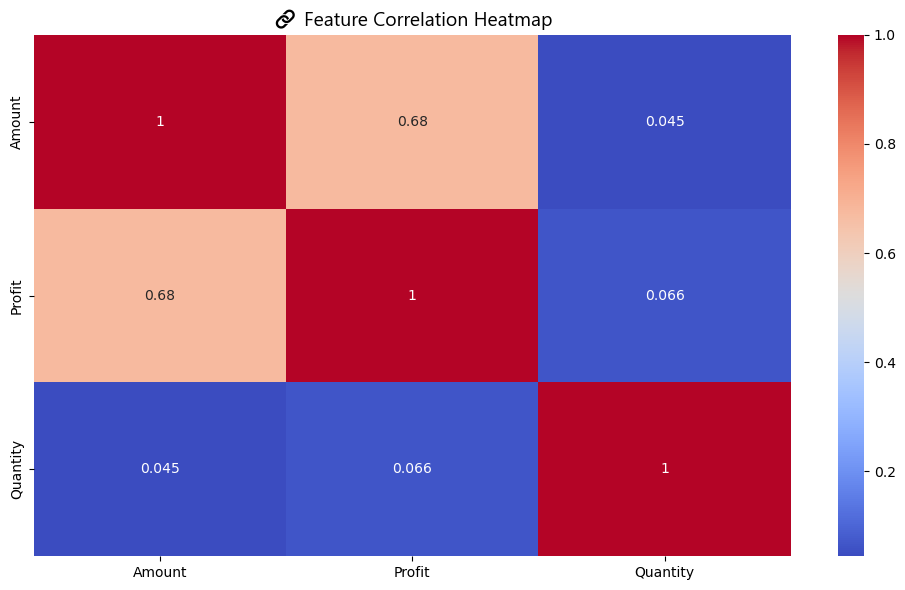

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("🔗 Feature Correlation Heatmap", fontsize=14, fontname='Segoe UI Emoji')
plt.tight_layout()
plt.show()
